<a href="https://colab.research.google.com/github/Gabriel-dev-bot/Emptech-2/blob/main/Assignment_5_2_Build_and_Apply_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
Summer Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. 5.2**</u> | <u>**Build and Apply Multilayer Perceptron**</u>
**Name** | Pabilan, Gabriel
**Section** | CPE31S1
**Date Performed**: |23/06/2024
**Date Submitted**: |23/06/2024
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard

<hr>

Part 1: Try the MLP Notebook using the CIFAR10 Keras Dataset

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define MLP model
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
391/391 [==============================] - 6s 14ms/step - loss: 2.0958 - accuracy: 0.2051 - val_loss: 1.9510 - val_accuracy: 0.2814
Epoch 2/10
391/391 [==============================] - 4s 9ms/step - loss: 1.9794 - accuracy: 0.2538 - val_loss: 1.8905 - val_accuracy: 0.3147
Epoch 3/10
391/391 [==============================] - 4s 9ms/step - loss: 1.9388 - accuracy: 0.2755 - val_loss: 1.8873 - val_accuracy: 0.3018
Epoch 4/10
391/391 [==============================] - 4s 11ms/step - loss: 1.9206 - accuracy: 0.2824 - val_loss: 1.8624 - val_accuracy: 0.3224
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 1.9059 - accuracy: 0.2900 - val_loss: 1.8238 - val_accuracy: 0.3305
Epoch 6/10
391/391 [==============================] - 4s 9ms/step - loss: 1.8965 - accuracy: 0.2965 - val_loss: 1.8004 - val_accuracy: 0.3463
Epoch 7/10
391/391 [==============================] - 3s 9ms/step - loss: 1.8870 - accuracy: 0.3025 - val_loss: 1.8184 - val_accuracy: 0.3401
Epo

Part 2:


* Choose any dataset
* Explain the problem you are trying to solve
* Create your own model
* Evaluate the accuracy of your model



**Dataset**
Water Quality

Explain the problem:
The problem is to predict the potability of the water based based on different physical and the chemical parameters. This model can accurately predict the water is potable or not based on these features

First row:
   ph  Hardness      Solids  Chloramines   Sulfate  Conductivity  \
0   0       NaN  204.890455  20791.31898  7.300212    368.516441   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  Unnamed: 10  
0      564.308654        10.379783   86.99097    2.963135            0  


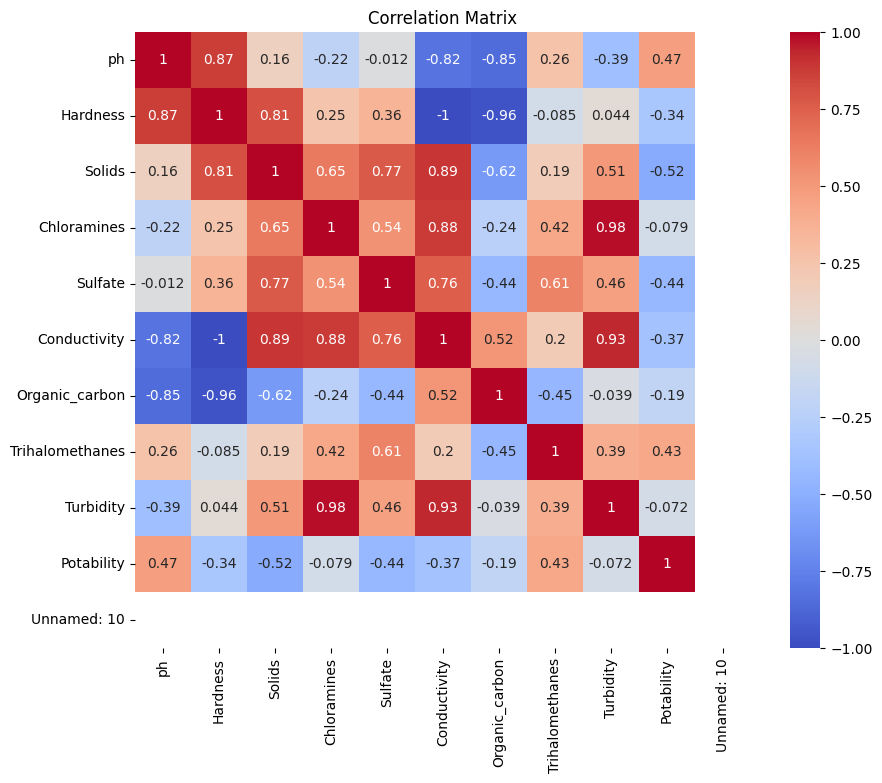

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: -8319.9199 - accuracy: 0.0000e+00 - val_loss: -11275.8945 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 38ms/step - loss: -9323.7217 - accuracy: 0.0000e+00 - val_loss: -12467.6602 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 39ms/step - loss: -10308.6904 - accuracy: 0.0000e+00 - val_loss: -13611.5439 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 39ms/step - loss: -11250.5986 - accuracy: 0.0000e+00 - val_loss: -14709.7061 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 55ms/step - loss: -12158.2256 - accuracy: 0.0000e+00 - val_loss: -15823.9531 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 59ms/step - loss: -13079.1514 - accuracy: 0.0000e+00 - val_loss: -16952.5488 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 44ms/step

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/water_quality.csv')

# Display the first row
print("First row:")
print(df.head(1))

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

# Select only the 4 most correlated features
corr_features = corr_matrix.nlargest(5, 'Potability')['Potability'].index
df_selected = df[corr_features].copy()

# Convert non-numeric columns to numeric
le = LabelEncoder()
for col in df_selected.columns:
    if df_selected[col].dtype == 'object':
        df_selected[col] = le.fit_transform(df_selected[col])

# Drop rows with missing values
df_selected.dropna(inplace=True)

# Split the data into training, validation, and test sets
X = df_selected.drop('Potability', axis=1)
y = df_selected['Potability']
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create a sequential model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')

Conclusion:

In this Activity it's hard to find dataset to make multilayer perceptrons. In my accuracy of the model i did research on how to do it so i can learn the basic codes to make it accurately get the results.
In this Activity i learn how to make my model predict if the water is safe to drink or not.